# Import Required Libraries

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns

# Load And Preprocess Dataset

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,file_name,center_temp,max_temp,min_temp
0,DIVU20240822145836_jpeg.rf.9c8cc20f71392d24ff5...,34.195479,35.300000,38.689459
1,DIVU20240822151334_jpeg.rf.fce1fbd5f06662a9d7b...,34.195479,47.100000,0.930000
2,DIVU20240905103923_jpeg.rf.143cc24dba3882fa371...,29.500000,31.500000,60.930000
3,DIVU20240905125543_jpeg.rf.3182fae78cf3ddccd87...,32.900000,35.500000,0.930000
4,DIVU20240905172412_jpeg.rf.c631e02de7408d5238d...,32.300000,36.800000,38.689459
...,...,...,...,...
1777,SLOGF20241127113817_jpeg.rf.4de35aa78d5db442fb...,46.200000,49.400000,0.930000
1778,SLOGF20241127115609_jpeg.rf.7f8471a7c70399e73e...,37.200000,51.500000,510.930000
1779,SLOGF20241127133151_jpeg.rf.e0f6a520553d5cca87...,28.800000,36.200000,0.930000
1780,SLOGF20241127134556_jpeg.rf.3e5a01432dbb76e591...,46.000000,55.600000,38.689459


In [4]:
df.shape

(1782, 4)

In [5]:
df.describe

<bound method NDFrame.describe of                                               file_name  center_temp  \
0     DIVU20240822145836_jpeg.rf.9c8cc20f71392d24ff5...    34.195479   
1     DIVU20240822151334_jpeg.rf.fce1fbd5f06662a9d7b...    34.195479   
2     DIVU20240905103923_jpeg.rf.143cc24dba3882fa371...    29.500000   
3     DIVU20240905125543_jpeg.rf.3182fae78cf3ddccd87...    32.900000   
4     DIVU20240905172412_jpeg.rf.c631e02de7408d5238d...    32.300000   
...                                                 ...          ...   
1777  SLOGF20241127113817_jpeg.rf.4de35aa78d5db442fb...    46.200000   
1778  SLOGF20241127115609_jpeg.rf.7f8471a7c70399e73e...    37.200000   
1779  SLOGF20241127133151_jpeg.rf.e0f6a520553d5cca87...    28.800000   
1780  SLOGF20241127134556_jpeg.rf.3e5a01432dbb76e591...    46.000000   
1781  SLOGF20241127150109_jpeg.rf.ad06a64904bbb0f2e3...    34.195479   

       max_temp    min_temp  
0     35.300000   38.689459  
1     47.100000    0.930000  
2     31.50

In [6]:
df['temp_range'] = df['max_temp'] - df['min_temp']
df['temp_range']

0        -3.389459
1        46.170000
2       -29.430000
3        34.570000
4        -1.889459
           ...    
1777     48.470000
1778   -459.430000
1779     35.270000
1780     16.910541
1781     37.181067
Name: temp_range, Length: 1782, dtype: float64

In [7]:
# Visualizations
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 0, 'Center Temperature')

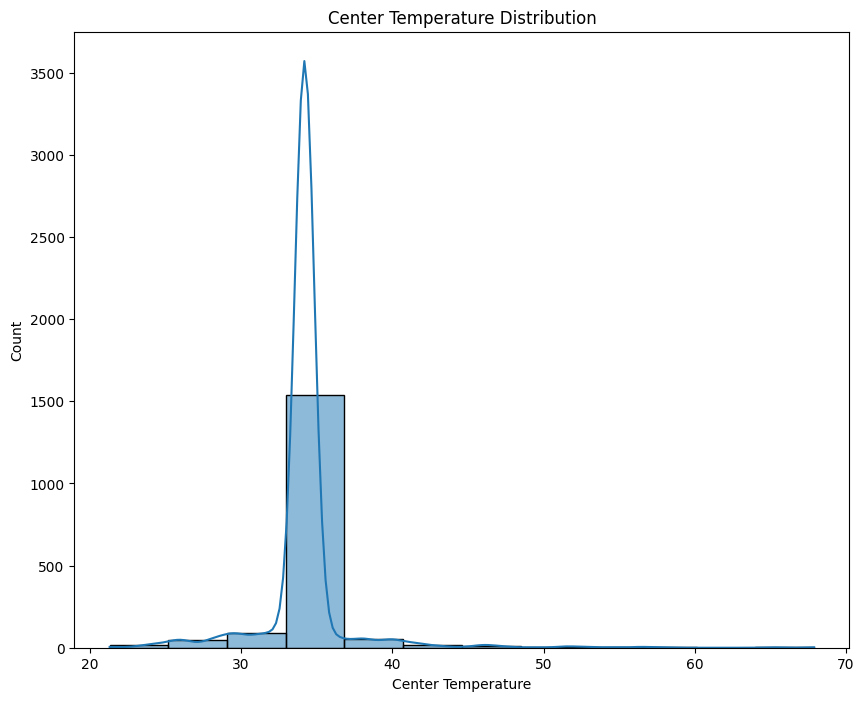

In [8]:
plt.figure(figsize=(10, 8))
sns.histplot(df['center_temp'], kde=True)
plt.title('Center Temperature Distribution')
plt.xlabel('Center Temperature')

Text(0.5, 0, 'Max Temperature')

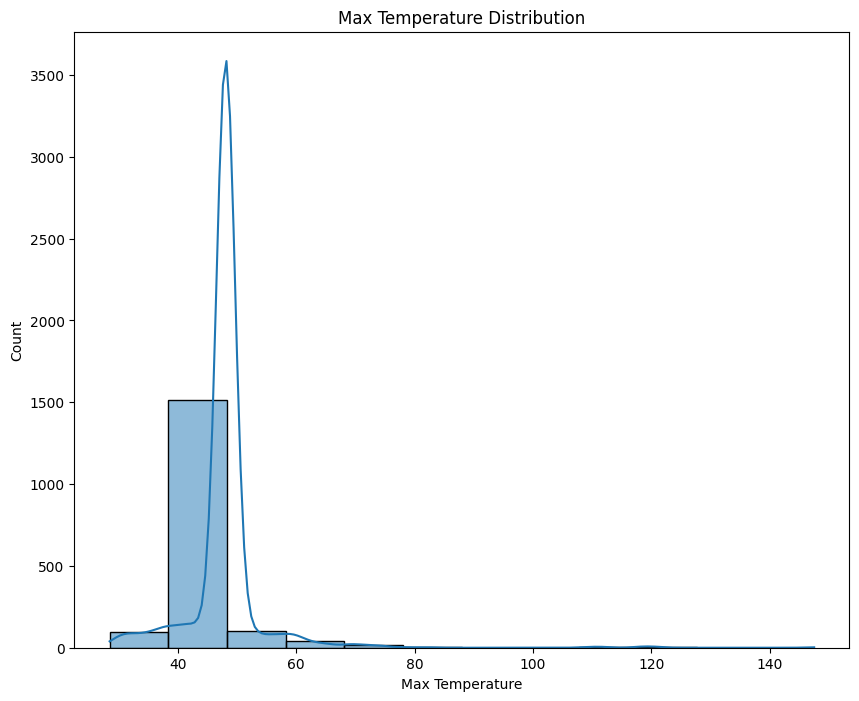

In [9]:
plt.figure(figsize=(10, 8))
sns.histplot(df['max_temp'], kde=True)
plt.title('Max Temperature Distribution')
plt.xlabel('Max Temperature')

Text(0.5, 0, 'Min Temperature')

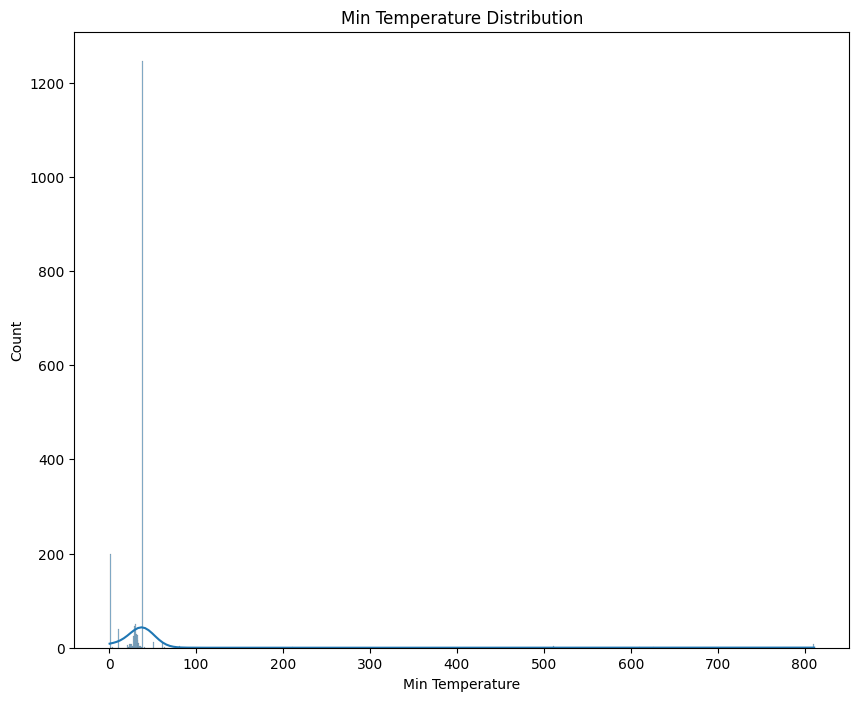

In [10]:
plt.figure(figsize=(10, 8))
sns.histplot(df['min_temp'], kde=True)
plt.title('Min Temperature Distribution')
plt.xlabel('Min Temperature')

Text(0, 0.5, 'Temperature')

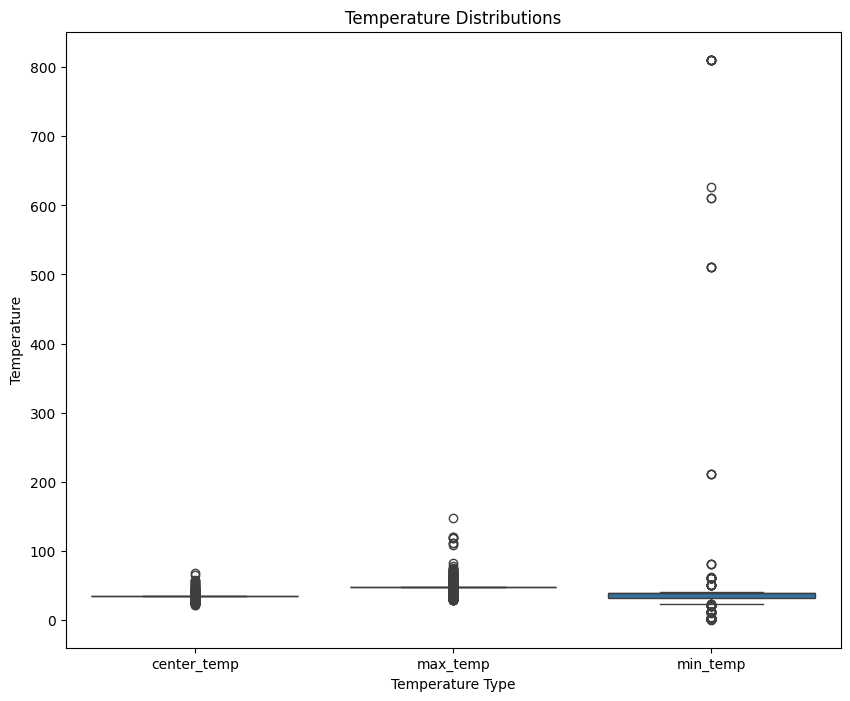

In [11]:
# Boxplot of temperature values
plt.figure(figsize=(10, 8))
temperature_data = pd.melt(df[['center_temp', 'max_temp', 'min_temp']], 
                           var_name='Temperature Type', 
                           value_name='Temperature')
sns.boxplot(x='Temperature Type', y='Temperature', data=temperature_data)
plt.title('Temperature Distributions')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature Range (Max-Min)')

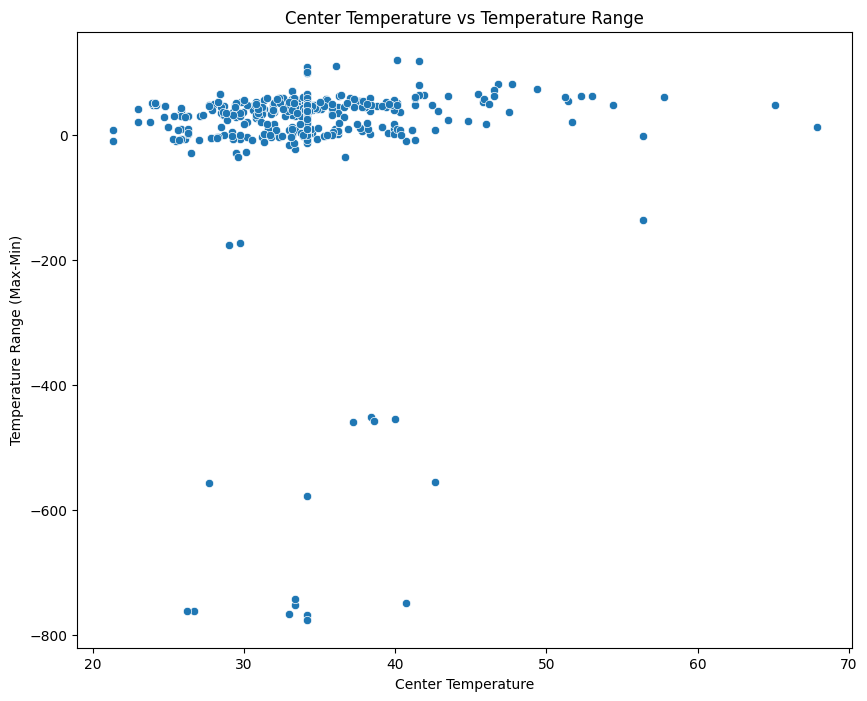

In [12]:
# Scatter plot: Center temp vs temperature range
plt.figure(figsize=(10, 8))
sns.scatterplot(x='center_temp', y='temp_range', data=df)
plt.title('Center Temperature vs Temperature Range')
plt.xlabel('Center Temperature')
plt.ylabel('Temperature Range (Max-Min)')

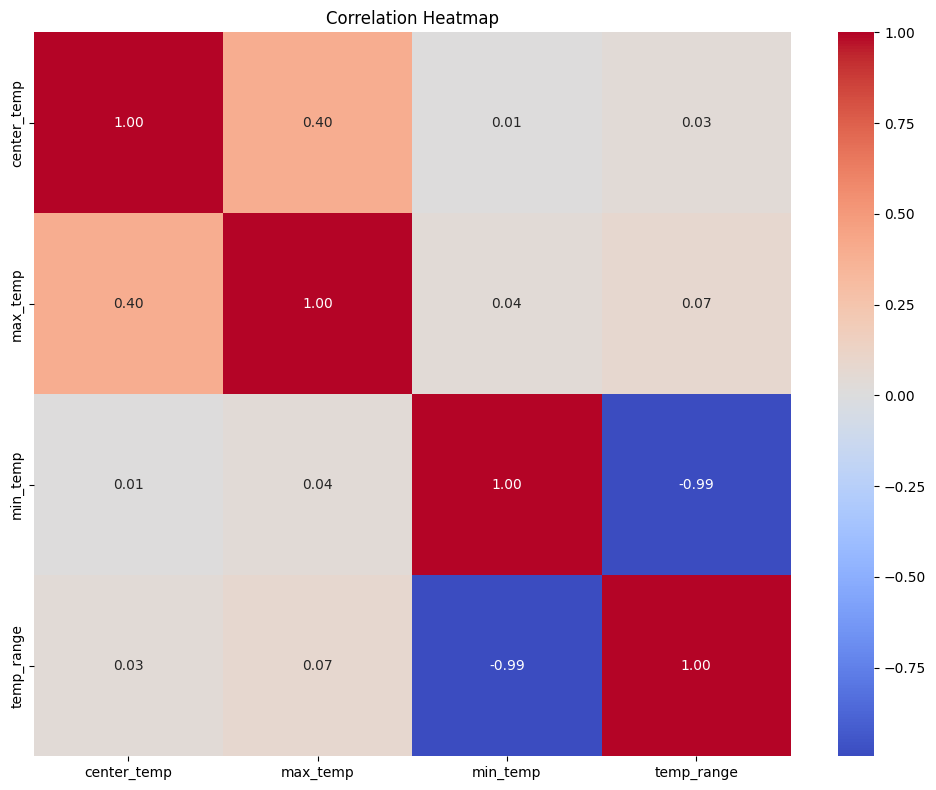

In [13]:
plt.figure(figsize=(10, 8))
numeric_cols = ['center_temp', 'max_temp', 'min_temp', 'temp_range']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

In [14]:
print("Additional Statistics:")
print(f"Average temperature range: {df['temp_range'].mean():.2f}")
print(f"Median center temperature: {df['center_temp'].median():.2f}")
print(f"Standard deviation of max temperature: {df['max_temp'].std():.2f}")

Additional Statistics:
Average temperature range: 9.42
Median center temperature: 34.20
Standard deviation of max temperature: 7.01


In [15]:
# Check if center_temp is always between min_temp and max_temp
valid_temp_range = (df['center_temp'] >= df['min_temp']) & (df['center_temp'] <= df['max_temp'])
print(f"\nRecords where center_temp is within min-max range: {valid_temp_range.sum()} ({valid_temp_range.mean()*100:.2f}%)")


Records where center_temp is within min-max range: 485 (27.22%)


In [19]:
df = df.drop(columns=["file_name"]) 
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Model Building

In [20]:
# Split the data
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

In [21]:
input_dim = df_scaled.shape[1]

In [22]:
input_layer = Input(shape=(input_dim,))

In [23]:
#encoded
encoded = Dense(2, activation='relu')(
    Dense(4, activation='relu')(
        Dense(8, activation='relu')(
            Dropout(0.2)(
                Dense(16, activation='relu')(input_layer)
            )
        )
    )
)

In [24]:
#  decoder layers 
decoded = Dense(input_dim, activation='sigmoid')(
    Dense(16, activation='relu')(
        Dropout(0.2)(
            Dense(8, activation='relu')(
                Dense(4, activation='relu')(encoded)
            )
        )
    )
)


In [25]:
# Define the autoencoder model
autoencoder = Model(input_layer, decoded)

In [26]:
autoencoder.compile(optimizer='adam', loss='mse')

In [27]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 526 (2.05 KB)

 Trainable params: 526 (2.05 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_autoencoder.keras', monitor='val_loss', save_best_only=True)

# Training

In [30]:
# Train the autoencoder
history = autoencoder.fit(
    X_train, X_train, 
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_data=(X_test, X_test),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1299 - val_loss: 0.1249
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1218 - val_loss: 0.1175
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1149 - val_loss: 0.1105
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1084 - val_loss: 0.1039
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1021 - val_loss: 0.0977
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0961 - val_loss: 0.0918
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0905 - val_loss: 0.0863
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0849 - val_loss: 0.0811
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0800 - val_loss: 0.0762
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0756 - val_loss: 0.0716
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0704 - val_loss: 0.0673
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

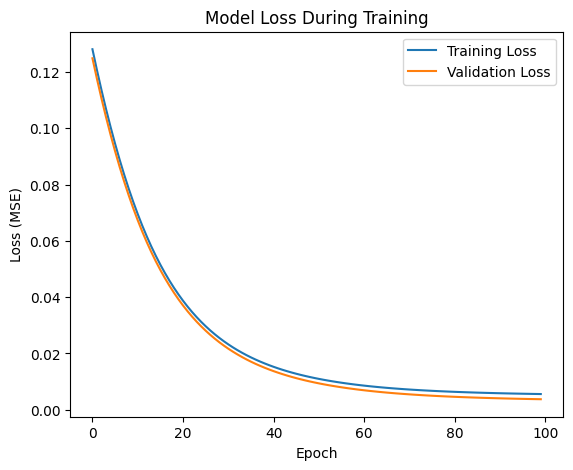

In [31]:
# Plot training history
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

In [32]:
test_loss = autoencoder.evaluate(X_test, X_test, verbose=0)
print(f"Test loss (MSE): {test_loss}")

Test loss (MSE): 0.003718799212947488


In [33]:
# Reconstruct the input data
print("Calculating reconstruction errors")
reconstructed = autoencoder.predict(df_scaled)


Calculating reconstruction errors
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [34]:
mse = np.mean(np.power(df_scaled - reconstructed, 2), axis=1)

In [35]:
df['ReconstructionError'] = mse

Text(0, 0.5, 'Frequency')

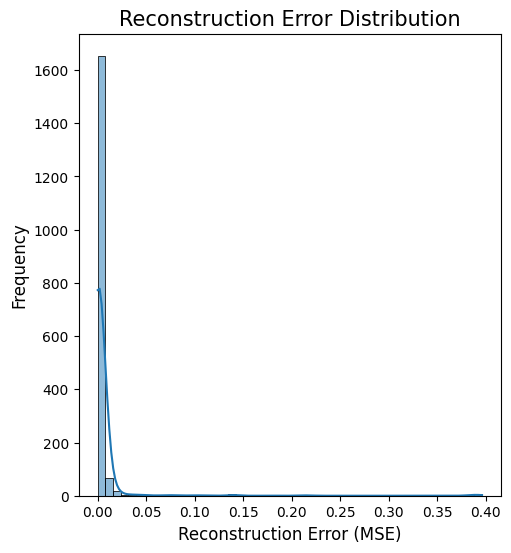

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['ReconstructionError'], bins=50, kde=True)
plt.title('Reconstruction Error Distribution', fontsize=15)
plt.xlabel('Reconstruction Error (MSE)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


In [37]:
# Determine optimal threshold using statistical methods
# Method 1: Set threshold at Q3 + 1.5*IQR (standard outlier detection)
Q1 = np.percentile(mse, 25)
Q3 = np.percentile(mse, 75)
IQR = Q3 - Q1
threshold_iqr = Q3 + 1.5 * IQR

In [38]:
# Method 2: Set threshold based on percentile
threshold_percentile = np.percentile(mse, 95)

In [39]:
# Method 3: Mean + 3*std (assuming normal distribution)
threshold_std = np.mean(mse) + 3 * np.std(mse)

In [40]:
print("\nThreshold calculation:")
print(f"IQR method threshold: {threshold_iqr:.6f}")
print(f"95th percentile threshold: {threshold_percentile:.6f}")
print(f"Mean + 3*std threshold: {threshold_std:.6f}")


Threshold calculation:
IQR method threshold: 0.001854
95th percentile threshold: 0.010571
Mean + 3*std threshold: 0.093973


# Anomaly detection

In [41]:
# Use the 95th percentile threshold for anomaly detection
threshold = threshold_percentile
anomalies = mse > threshold
df["Anomaly"] = anomalies.astype(int)

In [42]:
print(f"\nDetected {np.sum(anomalies)} anomalies out of {len(df)} data points ({np.sum(anomalies)/len(df)*100:.2f}%)")


Detected 89 anomalies out of 1782 data points (4.99%)


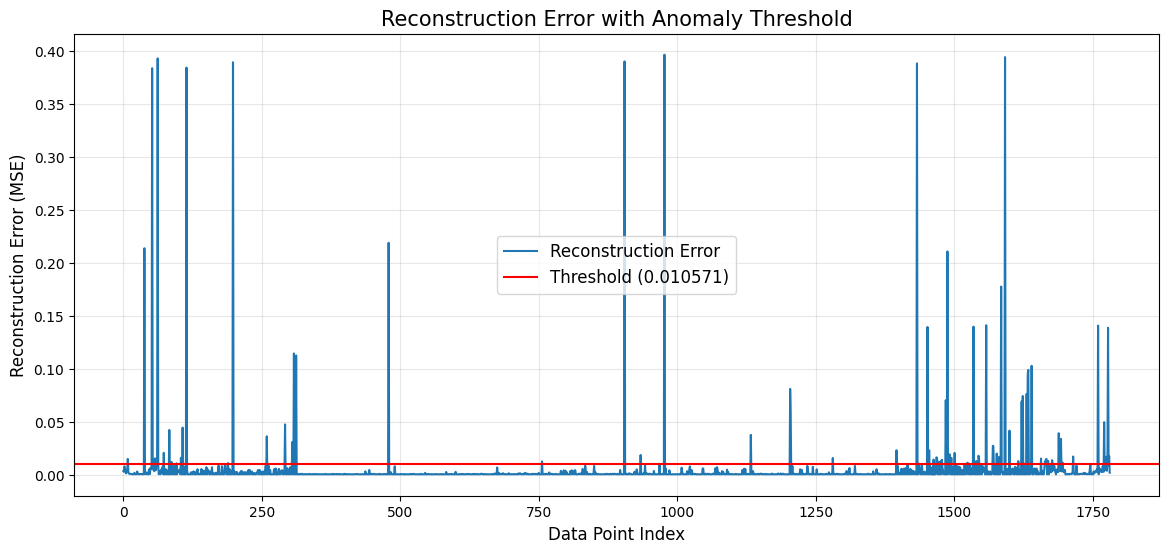

In [43]:
# Visualize reconstruction error with threshold
plt.figure(figsize=(14, 6))
plt.plot(mse, label='Reconstruction Error')
plt.axhline(y=threshold, color='r', linestyle='-', label=f'Threshold ({threshold:.6f})')
plt.title('Reconstruction Error with Anomaly Threshold', fontsize=15)
plt.xlabel('Data Point Index', fontsize=12)
plt.ylabel('Reconstruction Error (MSE)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [49]:
from scipy.stats import f_oneway

In [50]:
# Split data into two groups
normal_data = mse[df["Anomaly"] == 0]  # Non-anomalous instances
anomalous_data = mse[df["Anomaly"] == 1]  # Anomalous instances

In [51]:
anova_result = f_oneway(normal_data, anomalous_data)

# Display ANOVA results
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA p-value: {anova_result.pvalue}")

ANOVA F-statistic: 784.5895838209126
ANOVA p-value: 2.4054688419401603e-143


# Build prediction function

In [65]:
def predict_anomaly(min_temp, max_temp, center_temp=None, model=autoencoder, scaler=scaler, threshold=threshold):
    if center_temp is None:
        center_temp = (min_temp + max_temp) / 2
    temp_range = max_temp - min_temp
    sample = pd.DataFrame({
        'center_temp': [center_temp],
        'max_temp': [max_temp],
        'min_temp': [min_temp],
        'temp_range': [temp_range]
    })
    sample_scaled = scaler.transform(sample)
    reconstruction = model.predict(sample_scaled)
    mse = np.mean(np.power(sample_scaled - reconstruction, 2))
    is_anomaly = mse > threshold
    
    # Return the results
    return {
        "is_anomaly": bool(is_anomaly),
        "reconstruction_error": float(mse),
        "threshold": float(threshold),
        "normalized_error": float(mse / threshold),
        "input_values": {
            "center_temp": float(center_temp),
            "max_temp": float(max_temp),
            "min_temp": float(min_temp),
            "temp_range": float(temp_range)
        }
    }

In [66]:
#example
test_min_temp = 20.5
test_max_temp = 28.7
test_center_temp = 24.6 

In [67]:
result = predict_anomaly(test_min_temp, test_max_temp, test_center_temp)
print(f"Input values: Min={test_min_temp}, Max={test_max_temp}, Center={test_center_temp}")
print(f"Anomaly detection result: {'ANOMALY' if result['is_anomaly'] else 'NORMAL'}")
print(f"Reconstruction error: {result['reconstruction_error']:.6f}")
print(f"Threshold: {result['threshold']:.6f}")
print(f"Normalized error: {result['normalized_error']:.2f}x threshold")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Input values: Min=20.5, Max=28.7, Center=24.6
Anomaly detection result: ANOMALY
Reconstruction error: 0.018756
Threshold: 0.010571
Normalized error: 1.77x threshold


In [68]:
#example 2
test_min_temp = 10.0
test_max_temp = 40.0
test_center_temp = 25.0

In [69]:
result = predict_anomaly(test_min_temp, test_max_temp, test_center_temp)
print(f"Input values: Min={test_min_temp}, Max={test_max_temp}, Center={test_center_temp}")
print(f"Anomaly detection result: {'ANOMALY' if result['is_anomaly'] else 'NORMAL'}")
print(f"Reconstruction error: {result['reconstruction_error']:.6f}")
print(f"Threshold: {result['threshold']:.6f}")
print(f"Normalized error: {result['normalized_error']:.2f}x threshold")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Input values: Min=10.0, Max=40.0, Center=25.0
Anomaly detection result: ANOMALY
Reconstruction error: 0.013026
Threshold: 0.010571
Normalized error: 1.23x threshold


In [73]:
#example 3
test_min_temp = 30.0
test_max_temp = 45.0
test_center_temp = 37.0
result = predict_anomaly(test_min_temp, test_max_temp, test_center_temp)
print(f"Input values: Min={test_min_temp}, Max={test_max_temp}, Center={test_center_temp}")
print(f"Anomaly detection result: {'ANOMALY' if result['is_anomaly'] else 'NORMAL'}")
print(f"Reconstruction error: {result['reconstruction_error']:.6f}")
print(f"Threshold: {result['threshold']:.6f}")
print(f"Normalized error: {result['normalized_error']:.2f}x threshold")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Input values: Min=30.0, Max=45.0, Center=37.0
Anomaly detection result: NORMAL
Reconstruction error: 0.002003
Threshold: 0.010571
Normalized error: 0.19x threshold


In [74]:
#example 3
test_min_temp = 33.0
test_max_temp = 40.0
test_center_temp = 35.0
result = predict_anomaly(test_min_temp, test_max_temp, test_center_temp)
print(f"Input values: Min={test_min_temp}, Max={test_max_temp}, Center={test_center_temp}")
print(f"Anomaly detection result: {'ANOMALY' if result['is_anomaly'] else 'NORMAL'}")
print(f"Reconstruction error: {result['reconstruction_error']:.6f}")
print(f"Threshold: {result['threshold']:.6f}")
print(f"Normalized error: {result['normalized_error']:.2f}x threshold")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Input values: Min=33.0, Max=40.0, Center=35.0
Anomaly detection result: NORMAL
Reconstruction error: 0.002072
Threshold: 0.010571
Normalized error: 0.20x threshold
